## Analisis Faktor

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

from tabulate import tabulate

In [2]:
df = pd.read_csv("../data/pca_data.csv")
df.head()

,Unnamed: 0,trip_pendapatan_bersih,trip_poin_tambahan,trip_jarak,beh_peta_potensi,sosdem_usia,sosdem_jk,sosdem_pendidikan_terakhir,sosdem_jumlah_motor,sosdem_jumlah_mobil,...,loc_jumlah_dropoff,loc_populasi,loc_jml_b_permukiman,loc_avg_duration,trip_lamanya_waktu_pesanan,sosdem_status_nikah_Menikah,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,trip_jenis_pembayaran_Tunai
0,0,19200.0,150.0,9.55,1,47,0,3,1,0.0,...,123,17425,2325,1331.814570,0.416667,1,0,0,1,1
1,1,7200.0,150.0,0.37,1,47,0,3,1,0.0,...,133,22585,2569,1454.529801,0.216667,1,1,0,0,1
2,2,15600.0,150.0,7.62,1,47,0,3,1,0.0,...,224,9676,1516,1422.701987,0.416667,1,0,0,1,1
3,3,16000.0,150.0,7.80,1,47,0,3,1,0.0,...,218,23375,4699,1993.006623,0.416667,1,0,0,1,0
4,4,8000.0,150.0,3.90,1,47,0,3,1,0.0,...,123,17425,2325,1331.814570,0.200000,1,0,0,1,0


In [3]:
df_pca = df.drop('Unnamed: 0', axis=1)

In [5]:
df_pca.head()

,trip_pendapatan_bersih,trip_poin_tambahan,trip_jarak,beh_peta_potensi,sosdem_usia,sosdem_jk,sosdem_pendidikan_terakhir,sosdem_jumlah_motor,sosdem_jumlah_mobil,sosdem_anggota_rt,...,loc_jumlah_dropoff,loc_populasi,loc_jml_b_permukiman,loc_avg_duration,trip_lamanya_waktu_pesanan,sosdem_status_nikah_Menikah,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,trip_jenis_pembayaran_Tunai
0,19200.0,150.0,9.55,1,47,0,3,1,0.0,5,...,123,17425,2325,1331.814570,0.416667,1,0,0,1,1
1,7200.0,150.0,0.37,1,47,0,3,1,0.0,5,...,133,22585,2569,1454.529801,0.216667,1,1,0,0,1
2,15600.0,150.0,7.62,1,47,0,3,1,0.0,5,...,224,9676,1516,1422.701987,0.416667,1,0,0,1,1
3,16000.0,150.0,7.80,1,47,0,3,1,0.0,5,...,218,23375,4699,1993.006623,0.416667,1,0,0,1,0
4,8000.0,150.0,3.90,1,47,0,3,1,0.0,5,...,123,17425,2325,1331.814570,0.200000,1,0,0,1,0


In [4]:
def plot_correlation_matrix(data, title):
    correlation_matrix = data.corr()

    fig, ax = plt.subplots(figsize=(32, 24))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=ax)
    ax.set_title(title)

    # plt.savefig(title.lower().replace(" ", "_") + "_correlation_matrix.png", dpi=300, bbox_inches="tight")
    plt.show()

def plot_covariance_matrix(data, title):
    covariance_matrix = data.cov()

    fig, ax = plt.subplots(figsize=(32, 24))
    sns.heatmap(covariance_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=ax)
    ax.set_title(title)

    # plt.savefig(title.lower().replace(" ", "_") + "_covariance_matrix.png", dpi=300, bbox_inches="tight")
    plt.show()


Standarisasi data

In [6]:
feature_names = df_pca.columns.tolist()
scaler = StandardScaler()
df_pca_std = pd.DataFrame(scaler.fit_transform(df_pca), columns=feature_names)

df_pca_std

/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse i

,trip_pendapatan_bersih,trip_poin_tambahan,trip_jarak,beh_peta_potensi,sosdem_usia,sosdem_jk,sosdem_pendidikan_terakhir,sosdem_jumlah_motor,sosdem_jumlah_mobil,sosdem_anggota_rt,...,loc_jumlah_dropoff,loc_populasi,loc_jml_b_permukiman,loc_avg_duration,trip_lamanya_waktu_pesanan,sosdem_status_nikah_Menikah,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,trip_jenis_pembayaran_Tunai
0,1.720487,-0.057793,2.114714,-1.435950,1.171107,-0.035074,0.103689,-0.394344,-0.194808,0.765012,...,-0.903767,0.221166,-0.010709,-0.233092,0.370120,0.455016,-0.934173,-0.430732,1.284253,1.962934
1,-0.599947,-0.057793,-1.142896,-1.435950,1.171107,-0.035074,0.103689,-0.394344,-0.194808,0.765012,...,-0.872125,0.791719,0.107170,0.263845,-0.624671,0.455016,1.070465,-0.430732,-0.778663,1.962934
2,1.024357,-0.057793,1.429835,-1.435950,1.171107,-0.035074,0.103689,-0.394344,-0.194808,0.765012,...,-0.584176,-0.635659,-0.401546,0.134958,0.370120,0.455016,-0.934173,-0.430732,1.284253,1.962934
3,1.101705,-0.057793,1.493710,-1.435950,1.171107,-0.035074,0.103689,-0.394344,-0.194808,0.765012,...,-0.603161,0.879071,1.136198,2.444413,0.370120,0.455016,-0.934173,-0.430732,1.284253,-0.509441
4,-0.445251,-0.057793,0.109758,-1.435950,1.171107,-0.035074,0.103689,-0.394344,-0.194808,0.765012,...,-0.903767,0.221166,-0.010709,-0.233092,-0.707570,0.455016,-0.934173,-0.430732,1.284253,-0.509441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24411,-0.445251,-0.057793,-0.759647,-1.435950,0.213674,-0.035074,0.103689,-0.394344,4.073794,-0.777712,...,-0.435455,-0.782941,-0.922340,-0.884688,-0.873369,-2.197724,-0.934173,-0.430732,1.284253,1.962934
24412,-0.445251,-0.057793,-0.688675,-1.435950,0.213674,-0.035074,0.103689,-0.394344,4.073794,-0.777712,...,-0.435455,-0.782941,-0.922340,-0.884688,-0.707570,-2.197724,-0.934173,-0.430732,1.284253,1.962934
24413,0.560270,-0.057793,-0.411885,-1.435950,0.213674,-0.035074,0.103689,-0.394344,4.073794,-0.777712,...,2.244686,2.136720,3.305852,1.261553,-0.541772,-2.197724,1.070465,-0.430732,-0.778663,1.962934
24414,0.908335,-0.057793,1.564682,-1.435950,0.213674,-0.035074,0.103689,-0.394344,4.073794,-0.777712,...,0.539142,-0.237488,-0.829583,-0.596824,2.276802,-2.197724,-0.934173,-0.430732,1.284253,-0.509441


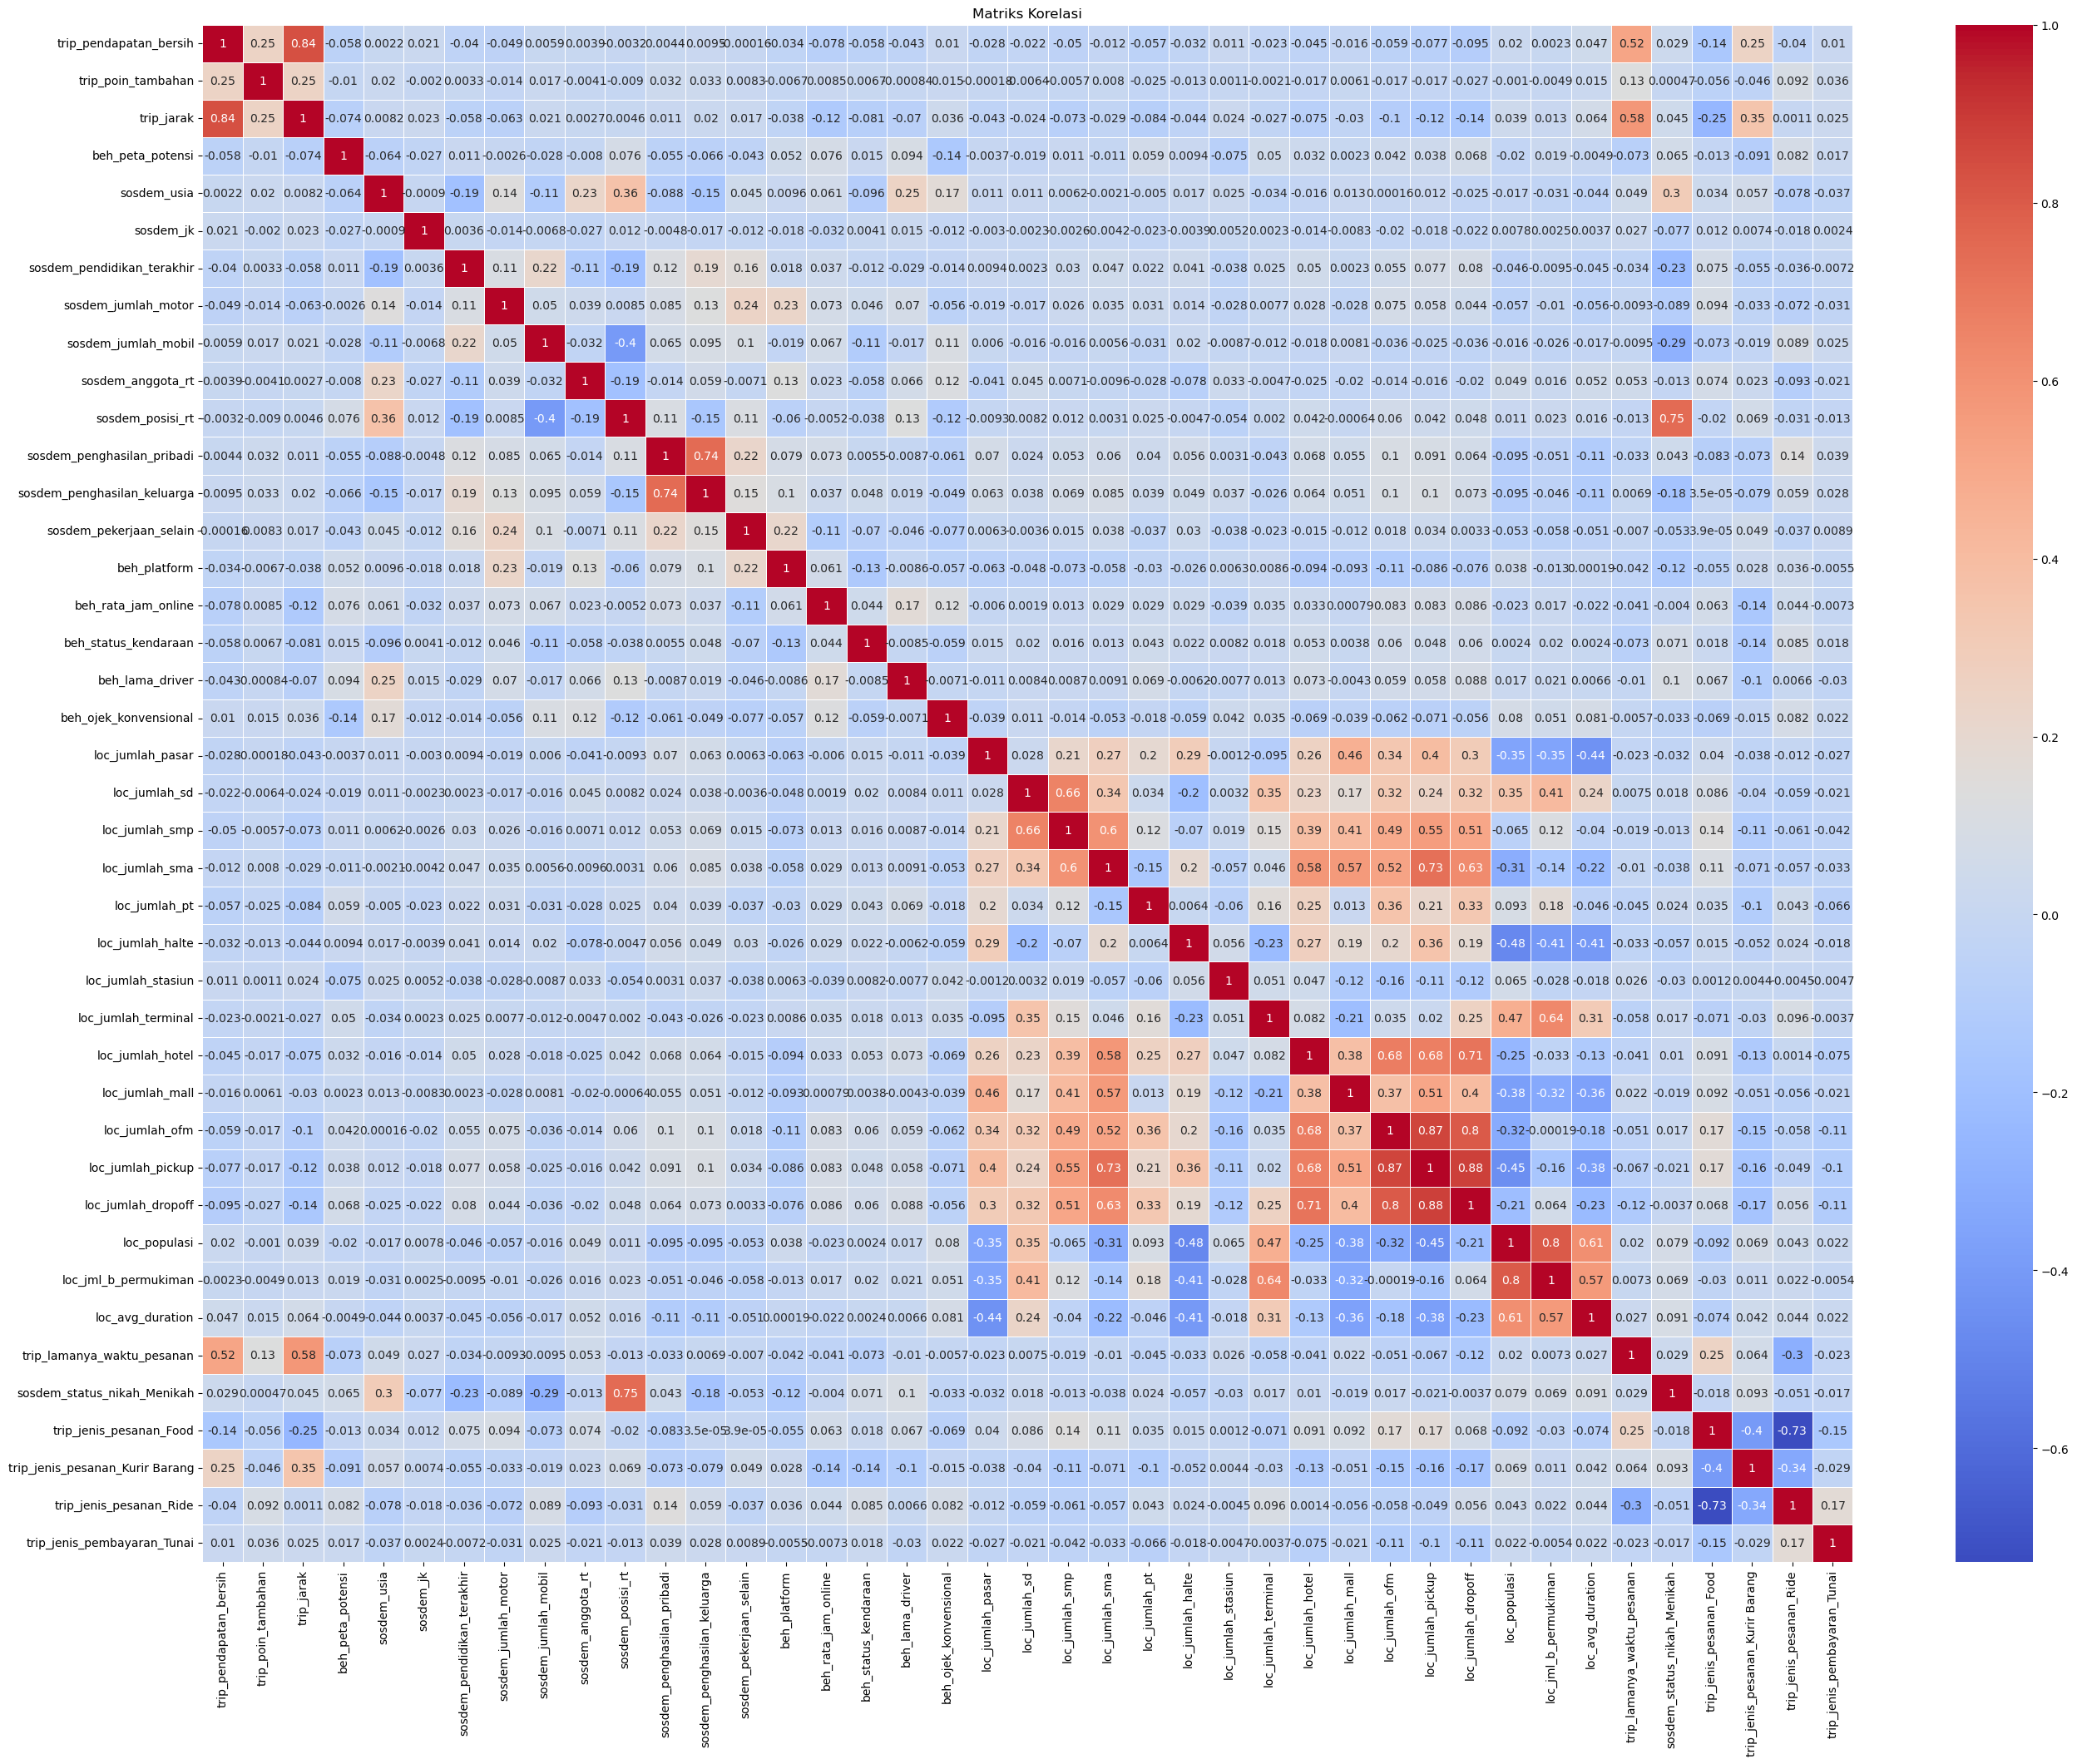

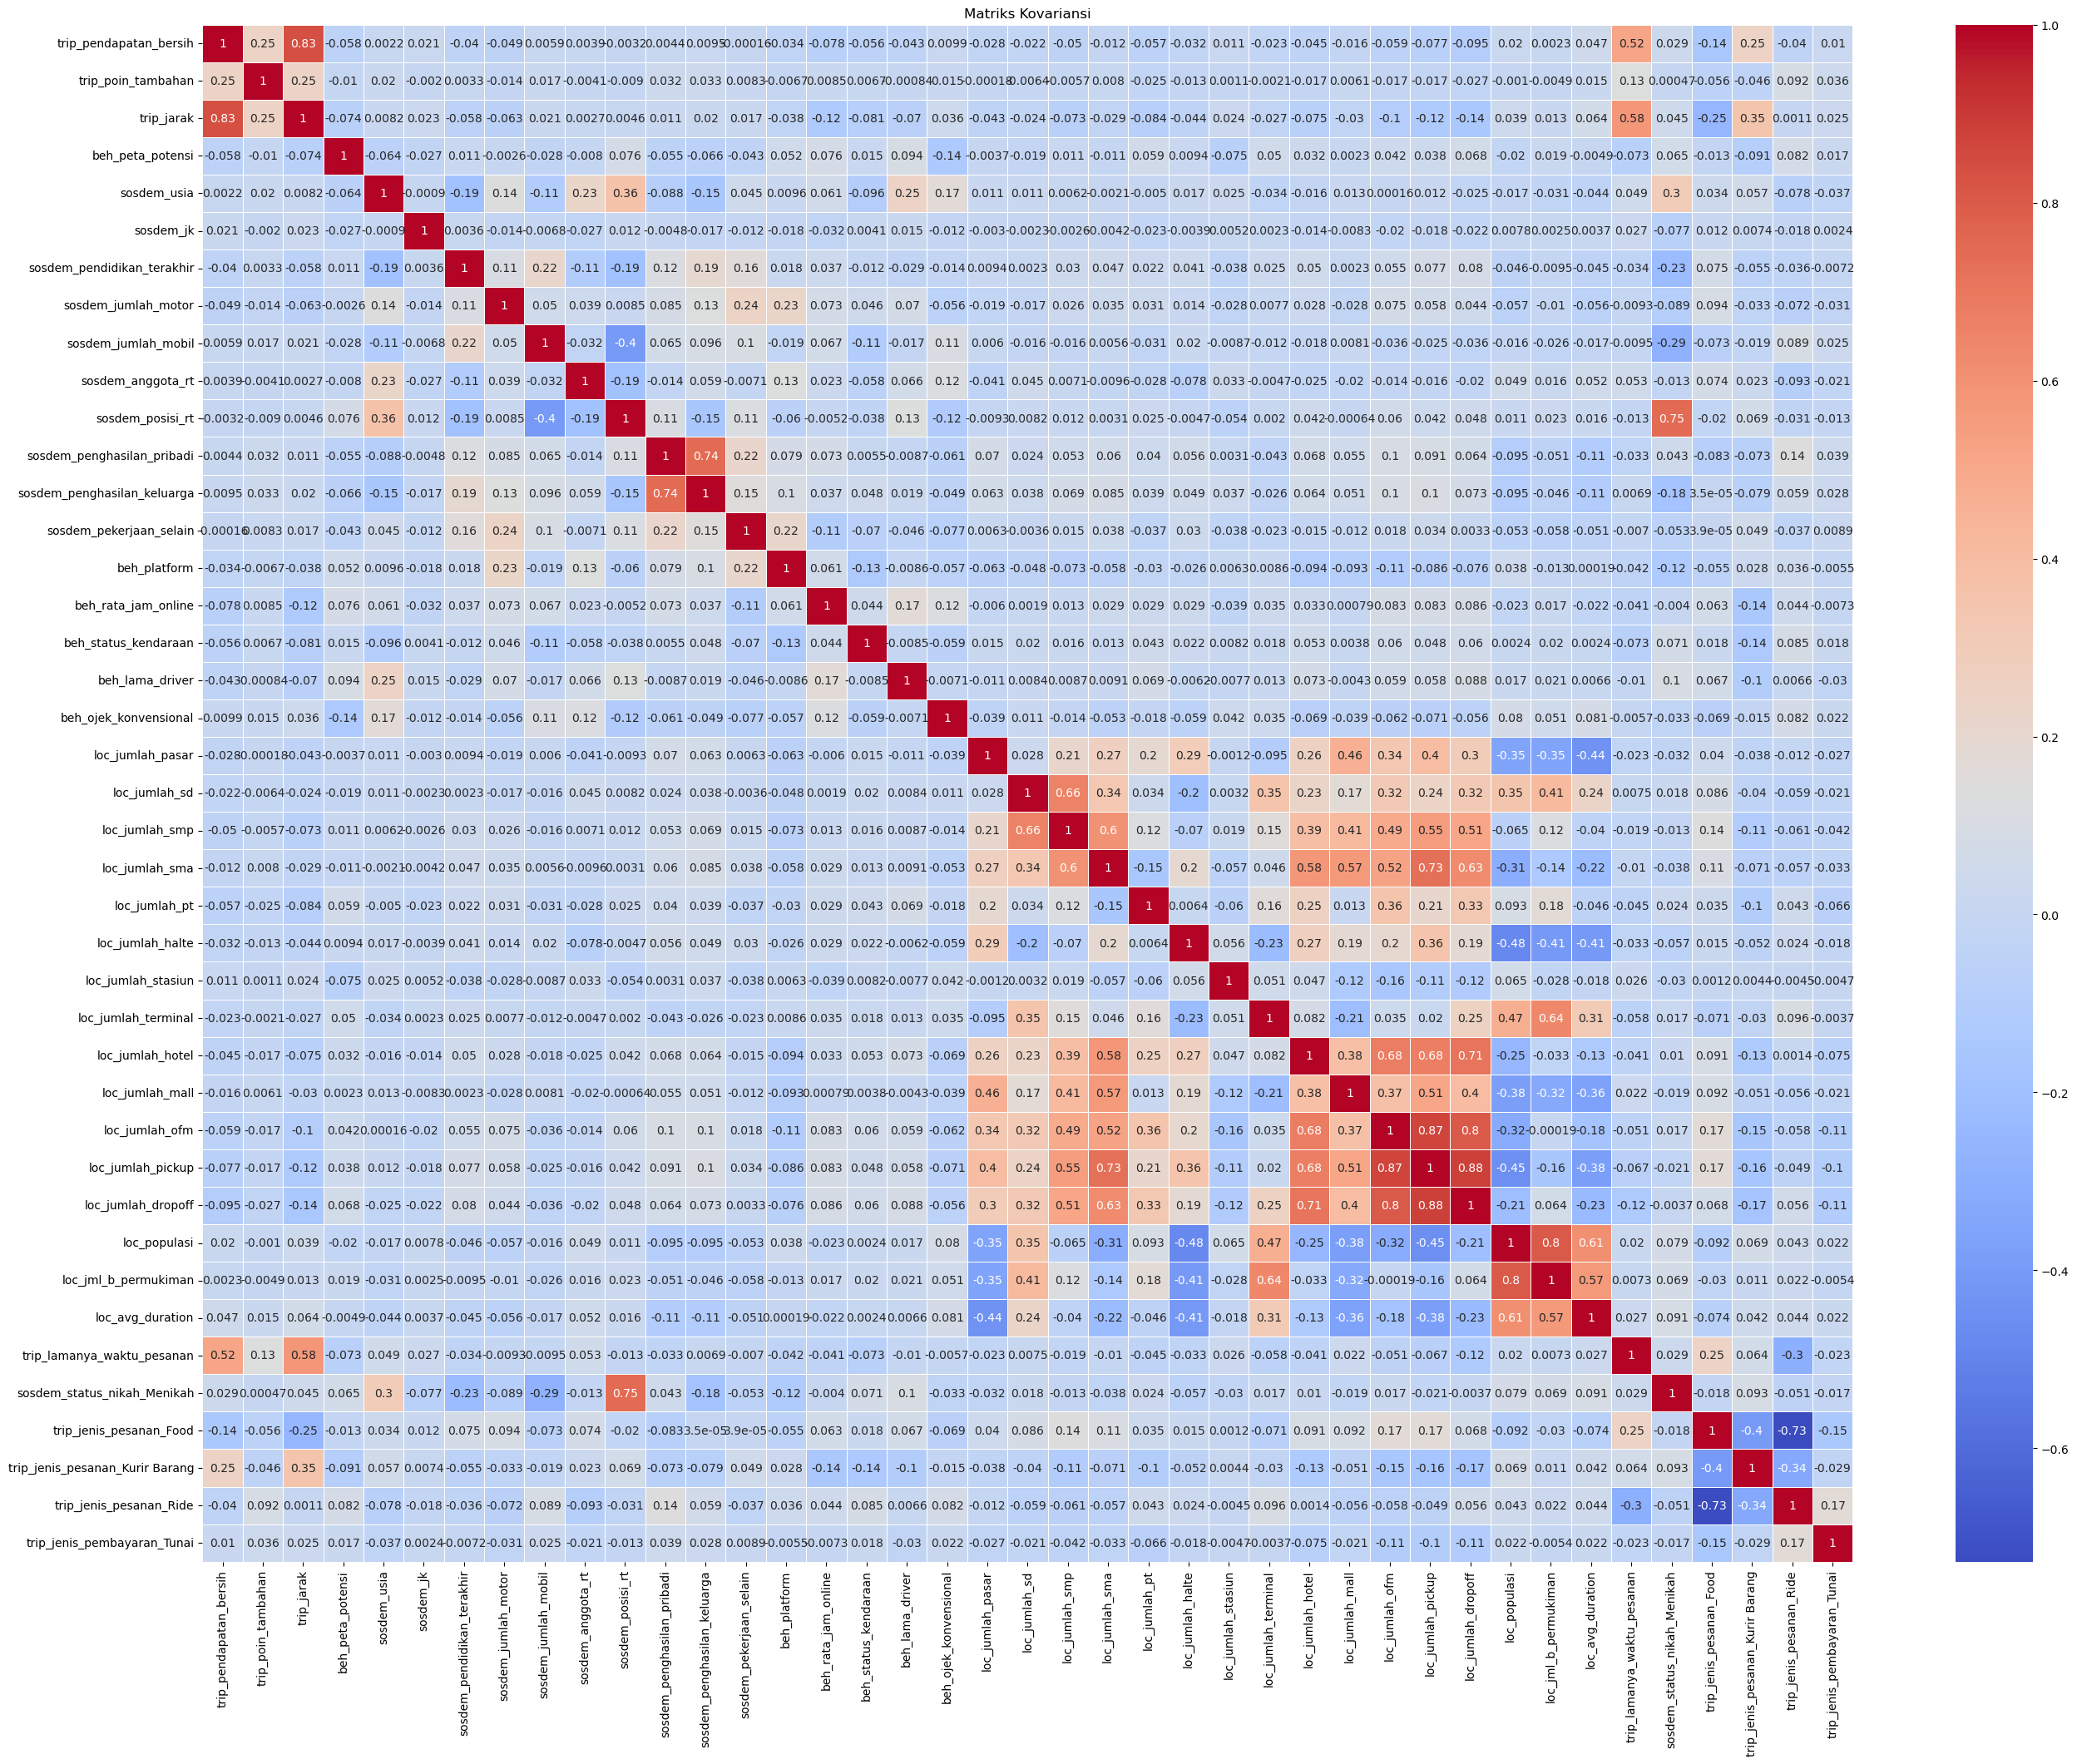

In [7]:
# Create heatmap for correlation matrix
plot_correlation_matrix(df_pca_std, "Matriks Korelasi")

# Create heatmap for covariance matrix
plot_covariance_matrix(df_pca_std, "Matriks Kovariansi")

In [8]:
threshold = 0.8
high_correlation_pairs = []
covariance_matrix = df_pca_std.cov()

for i in range(len(covariance_matrix.columns)):
    for j in range(i + 1, len(covariance_matrix.columns)):
        if abs(covariance_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((covariance_matrix.columns[i], covariance_matrix.columns[j]))

In [9]:
high_correlation_pairs

[('trip_pendapatan_bersih', 'trip_jarak'),
 ('loc_jumlah_ofm', 'loc_jumlah_pickup'),
 ('loc_jumlah_ofm', 'loc_jumlah_dropoff'),
 ('loc_jumlah_pickup', 'loc_jumlah_dropoff'),
 ('loc_populasi', 'loc_jml_b_permukiman')]

### Skenario 1
Tanpa menghapus data populasi ataupun jumlah bangunan

In [10]:
test1 = df_pca_std.drop(['loc_jumlah_pickup', 'loc_jumlah_dropoff'], axis=1)

In [11]:
# Menghapus baris yang memiliki missing values dari DataFrame
test1.dropna(inplace=True)

##### Tes Kecukupan (Adequacy Test)
Tes kecukupan pada analisis faktor ini bisa dilakukan dengan beberapa cara. Pada analisis ini dilakukan dengan 2 cara yaitu dengan Tes Bartlett dan Tes Kaiser-Meyer-Olkin (KMO).

* Tes Bartlett <br>
Tes ini dilakukan untuk mengetahui apakah matriks korelasi seluruh variabel dengan matriks identitas. Apabila matriks tersebut mirip dengan matriks identitas, maka semua variabel memiliki korelasi yang buruk. Tes Bartlett menghasilkan suatu p-value yang menunjukkan apakah perbedaan dengan matriks identitas signifikan atau tidak.

In [12]:
chi_square_value,p_value=calculate_bartlett_sphericity(test1)
print(f'chi-square: {chi_square_value}')
print(f'p-value: {p_value:.16f}')

chi-square: 538055.7074846129
p-value: 0.0000000000000000


Nilai p-value yang dihasilkan lebih kecil dari 0.05. Hal tersebut menunjukkan bahwa tes ini signifikan secara statistik dan perbedaan dari chi-square yang rendah.

* Kaiser-Meyer-Olkin <br>
Tes KMO ini digunakan untuk`kelayakan atau kecukupan sampel data dengan mengestimasi proporsi variansi dari seluruh variabel. Nilai KMO ini memiliki rentang 0 hingga 1 dengan nilai dibawah 0.6 menunjukkan data kurang layak.

In [13]:
kmo_all,kmo_model=calculate_kmo(test1)
print(f'Nilai KMO: {kmo_model:.16f}')

Nilai KMO: 0.5989577601072829


/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Nilai KMO kurang dari 0.6

### Skenario 2
Menghapus variabel jumlah bangunan

In [18]:
test2 = df_pca_std.drop(['loc_jumlah_pickup', 'loc_jumlah_dropoff','loc_jml_b_permukiman'], axis=1)

In [19]:
# Menghapus baris yang memiliki missing values dari DataFrame
test2.dropna(inplace=True)

In [20]:
chi_square_value,p_value=calculate_bartlett_sphericity(test2)
print(f'chi-square: {chi_square_value}')
print(f'p-value: {p_value:.16f}')

chi-square: 497109.35674333456
p-value: 0.0000000000000000


In [21]:
kmo_all,kmo_model=calculate_kmo(test2)
print(f'Nilai KMO: {kmo_model:.16f}')

Nilai KMO: 0.5935434032730951


/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


### Skenario 3
Menghapus variabel populasi

In [22]:
test3 = df_pca_std.drop(['loc_jumlah_pickup', 'loc_jumlah_dropoff','loc_populasi'], axis=1)

In [23]:
# Menghapus baris yang memiliki missing values dari DataFrame
test3.dropna(inplace=True)

In [24]:
chi_square_value,p_value=calculate_bartlett_sphericity(test3)
print(f'chi-square: {chi_square_value}')
print(f'p-value: {p_value:.16f}')

chi-square: 495931.6928172694
p-value: 0.0000000000000000


In [25]:
kmo_all,kmo_model=calculate_kmo(test3)
print(f'Nilai KMO: {kmo_model:.16f}')

Nilai KMO: 0.5989156238537413


/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Ternyata sama saja......